In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam


# Load Dataset

In [6]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ensure Y_train is 1D
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(Y_train), 
    y=Y_train.ravel()  # Converts to 1D
)

print("Class Weights:", dict(zip(np.unique(Y_train), class_weights)))

Class Weights: {0.0: 1.0, 1.0: 1.0}


In [9]:
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts))) 


{0.0: 1000, 1.0: 1000}


In [10]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


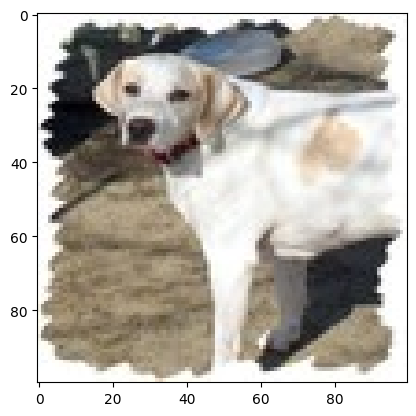

In [11]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [12]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,  # Starting learning rate
    decay_steps=100000,          # Number of steps to take before decaying
    decay_rate=0.96,             # Decay rate
    staircase=True               # Whether to apply the decay in discrete steps
)


# Model

In [13]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)),
    #MaxPooling2D((2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(optimizer=Adam(learning_rate=lr_schedule),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# early stoping 

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, Y_train, epochs = 15, batch_size = 64,callbacks=[early_stopping], validation_data=(X_test, Y_test))

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 694ms/step - accuracy: 0.4948 - loss: 2.7015 - val_accuracy: 0.5000 - val_loss: 1.0798
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 659ms/step - accuracy: 0.5257 - loss: 1.1523 - val_accuracy: 0.5025 - val_loss: 0.9589
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 634ms/step - accuracy: 0.5012 - loss: 0.9357 - val_accuracy: 0.5000 - val_loss: 0.8705
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 658ms/step - accuracy: 0.4891 - loss: 0.8570 - val_accuracy: 0.5000 - val_loss: 0.8213
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 621ms/step - accuracy: 0.5022 - loss: 0.8122 - val_accuracy: 0.5000 - val_loss: 0.7881
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.5000 - loss: 0.7818 - val_accuracy: 0.5000 - val_loss: 0.7647
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 664ms/step - accuracy: 0.4732 - loss: 0.7606 - val_accuracy: 0.5000 - val_loss: 0.7478
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.4986 - loss: 0.7444 - val_accu

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.6469 - loss: 0.7112


[0.6758679151535034, 0.5874999761581421]

In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14112)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       903,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 960,481 (3.66 MB)

 Trainable params: 960,481 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

# Making predictions

In [2]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

NameError: name 'random' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
labels = ['dog', 'cat']
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
con = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=labels)
disp.plot()

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "C:/Users/PMLS/Desktop/deep learning/download (1).jfif"  # Replace with your image path
img = image.load_img(img_path, target_size=(100, 100))  # Resize to (100, 100)

# Preprocess the image
img_array = image.img_to_array(img)  # Convert to array
img_array = img_array / 255.0        # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
prediction = prediction > 0.5

# Interpret the result
if prediction[0][0] ==0 :
    print("Prediction: Dog ")
else:
    print("Prediction: Cat")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/PMLS/Desktop/deep learning/download (1).jfif'